# 一张不一样的折线图

### 1. 初始设置

首先，导入所需的库，并设置中文字体和定义颜色等。

In [12]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 自动适应布局
mpl.rcParams.update({'figure.autolayout': True})

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 定义颜色，主色：蓝色，辅助色：灰色，互补色：橙色
colors = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
          '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
          '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

### 2. 读取数据

In [13]:
# 数据源路径
filepath='./data/2020年第一季度上证指数.xlsx'

# 读取 Excel文件
df = pd.read_excel(filepath).set_index('日期')

# 日期，开盘价，收盘价，最高价，最低价
x = df.index.strftime('%m-%d')
y1 = df['开盘价'].values
y2 = df['收盘价'].values
ymax = df['最高价'].values
ymin = df['最低价'].values

# 显示前 5 行数据，了解数据结构
df.head(5)

,开盘价,最高价,最低价,收盘价,涨跌额,涨跌幅(%),成交量(股),成交金额(元)
日期,,,,,,,,
2020-01-02,3066.34,3098.10,3066.34,3085.20,35.07,1.15,292470208,3.271971e+11
2020-01-03,3089.02,3093.82,3074.52,3083.79,-1.41,-0.05,261496667,2.899917e+11
2020-01-06,3070.91,3107.20,3065.31,3083.41,-0.38,-0.01,312575842,3.311825e+11
2020-01-07,3085.49,3105.45,3084.33,3104.80,21.39,0.69,276583111,2.881592e+11
2020-01-08,3094.24,3094.24,3059.13,3066.89,-37.91,-1.22,297872553,3.065174e+11


### 3. 开始画图

用「**面向对象**」的方法画图。

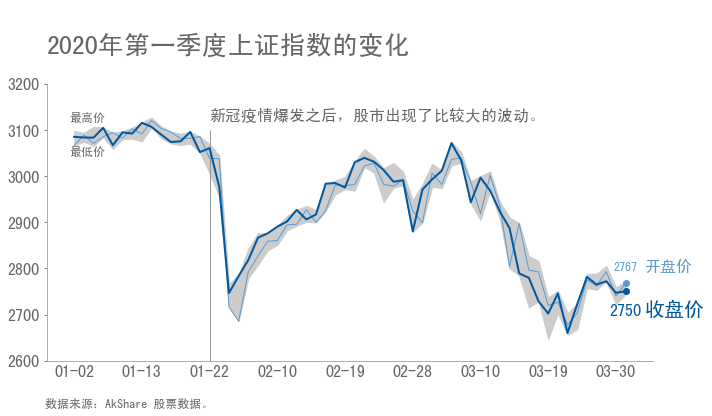

In [14]:
# 使用「面向对象」的方法画图
fig, ax = plt.subplots(figsize=(10, 6))

# 设置标题
ax.set_title('\n2020年第一季度上证指数的变化\n', fontsize=26, loc='left', color=colors['深灰色'])

# 开始画图，时间线图（颜色/线条类型/标记）
ax.plot(x, y1, label='开盘价', color=colors['浅蓝色'], ls='-', lw=1, marker='o', markevery=[-1])
ax.plot(x, y2, label='收盘价',color=colors['蓝色'], ls='-', lw=2, marker='o', markevery=[-1])

# 填充区域
ax.fill_between(x, ymin, ymax, color=colors['浅灰色'])
# 提示填充区域的最大值和最小值
ax.text(-0.5, ymax[0]+20, '最高价', color=colors['深灰色'], fontsize=12)
ax.text(-0.5, ymin[0]-22, '最低价', color=colors['深灰色'], fontsize=12)

# 直接在折线图的旁边标记图例，并保持颜色一致
ax.text(len(x)+1, y1[-1]+26, '开盘价', fontsize=16, color=colors['浅蓝色'])
ax.text(len(x)+1, y2[-1]-52, '收盘价', fontsize=20, color=colors['蓝色'])

# 显示最后 n 个数据的标签
n = 1
# 设置第一条折线图的数据标签
for a, b in zip(x[-n:], y1[-n:]):
    plt.text(a, b+25, '%.0f' % b, ha='center', va= 'bottom', fontsize=12, color=colors['浅蓝色'])
# 设置第二条折线图的数据标签
for a, b in zip(x[-n:], y2[-n:]):
    plt.text(a, b-56, '%.0f' % b, ha='center', va= 'bottom', fontsize=16, color=colors['蓝色'])

# 设置 X 轴显示的标签
xt = []
for i in np.arange(len(x)):
    if i % 7 == 0:
        xt.append(x[i])
    else:
        xt.append('')
ax.set_xticklabels(xt)

#设置Y轴范围，便于观察
ax.set_ylim(2600, 3200)

# 添加辅助线
lc = ax.vlines(df.index.get_loc('2020-01-22'), 2600, 3100, color=colors['灰色'], ls='-')
# 设置线条宽度
lc.set_linewidth(1)
# 文字说明数据来源
ax.text(-3, 2500, '数据来源：AkShare 股票数据。', fontsize=12, color=colors['深灰色'], ha='left')

ax.text(df.index.get_loc('2020-01-22'), 3120, '新冠疫情爆发之后，股市出现了比较大的波动。', fontsize=16, color=colors['深灰色'])

# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(colors['灰色'])
ax.spines['left'].set_color(colors['灰色'])

# 隐藏 X 轴的刻度线
ax.tick_params(axis='x', which='major', length=0)

# 设置坐标标签字体大小和颜色
ax.tick_params(labelsize=16, colors=colors['深灰色'])

plt.show()